In [2]:
#Import libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors

In [8]:
# Get a list of all named colors supported by matplotlib - if you want to change it up!
all_colors = list(mcolors.CSS4_COLORS.keys())
print(all_colors)

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

black


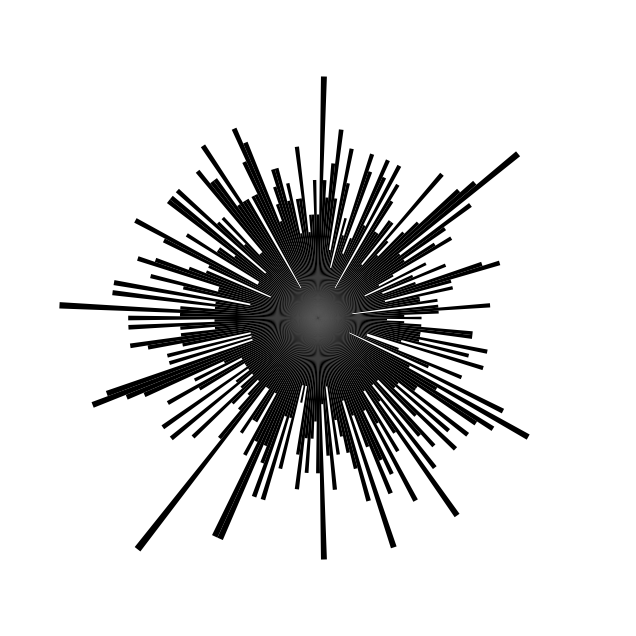

In [27]:
#Custom controlled Fractal Gate -Feel free to mess around with different gates!
def fractal_gate(qc, control, target, depth):
        '''
        qc.h(target)
        qc.x(target)
        '''
        qc.h(target)
        #qc.reset(1)
        qc.x(target)
        #qc.reset(1)
        return

#Function 2 Create Quantum "Kaleidoscope" Circuit
def create_kaleidoscope(num_reflections, fractal_depth):
    qr = QuantumRegister(num_reflections, name='q')
    cr = ClassicalRegister(num_reflections, name='c')
    kaleidoscope_circuit = QuantumCircuit(qr, cr)
    
    for i in range(num_reflections):
        fractal_gate(kaleidoscope_circuit, qr[i], qr[(i + 1) % num_reflections], fractal_depth)
        for j in range(i + 1, num_reflections):
            kaleidoscope_circuit.cx(qr[i], qr[j])
            
    kaleidoscope_circuit.measure(qr, cr)
    
    return kaleidoscope_circuit

#Function 2 plot the quantum "kaleidoscope" pattern
def plot_kaleidoscope_pattern(pattern_counts, num_reflections):
    
    #Some of the colors I liked best - feel free to change them up!
    #colors = ['purple', 'blue', 'orange',  'green', 'black','blueviolet', 'brown', 'crimson', 'darkblue', 'darkgoldenrod', 'darkgreen', 'darkolivegreen', 'steelblue', 'crimson']
    colors = ['black']
    #Get a list of all named colors supported by matplotlib
    #colors = list(mcolors.CSS4_COLORS.keys())
     
    #Choose a random color from the list -can change to all_colors if you'd like!
    color = random.choice(colors)
    print(color)
    
    pattern_labels = [format(i, f'0{num_reflections}b') for i in range(2**num_reflections)]
    pattern_values = [pattern_counts.get(label, 0) for label in pattern_labels]
    
    theta = 2 * np.pi / len(pattern_labels)
    angles = [i * theta for i in range(len(pattern_labels))]
    
    ax = plt.subplot(111, projection='polar')
    bars = ax.bar(angles, pattern_values, width=theta, bottom=0.0)
    
    #Set 2 Random Color
    for bar in bars:
      bar.set_facecolor(color)
    
    
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)

    
styles = ['dark_background', 'default']
style = random.choice(styles)
plt.style.use(style)

#Define # of reflections and fractal depth - Change up the numbers if you like!
reflections = [8, 8, 9, 7, 7]

num_reflections = random.choice(reflections)
fractal_depth = 3

plt.figure(figsize=(12, 8))

#Create Quantum "Kaleidoscope" Circuit W/Fractal patterns
kaleidoscope_circuit = create_kaleidoscope(num_reflections, fractal_depth)


#Execute Quantum Circuit & get Measurement Outcomes
backend = Aer.get_backend('qasm_simulator')
shot = [2000, 1000, 1500, 3000]
pick = random.choice(shot)
job = execute(kaleidoscope_circuit, backend, shots=pick)
result = job.result()
pattern_counts = result.get_counts(kaleidoscope_circuit)

#Plot Quantum "kaleidoscope" Pattern
plot_kaleidoscope_pattern(pattern_counts, num_reflections)


In [30]:
#ITS ALSO PRETTY COOL TO ADD SOME ANIMATIONS! 

#For Custom Controlled Fractal Gate
def fractal_gate(qc, control, target, depth):
    
    qc.h(target)
    qc.x(target)
    '''
    qc.h(target)
    qc.x(target)
    qc.reset(1)
    '''
      
#Function 2 Create Quantum "Kaleidoscope" Circuit
def create_kaleidoscope(num_reflections, fractal_depth):
    qr = QuantumRegister(num_reflections, name='q')
    cr = ClassicalRegister(num_reflections, name='c')
    kaleidoscope_circuit = QuantumCircuit(qr, cr)
    
    for i in range(num_reflections):
        fractal_gate(kaleidoscope_circuit, qr[i], qr[(i + 1) % num_reflections], fractal_depth)
        for j in range(i + 1, num_reflections):
            kaleidoscope_circuit.cx(qr[i], qr[j])
            
    kaleidoscope_circuit.measure(qr, cr)
    
    return kaleidoscope_circuit


#Function 2 Plot Quantum "Kaleidoscope" Pattern
def plot_kaleidoscope_pattern(pattern_counts, num_reflections):
  
    #plot function
    pattern_labels = [format(i, f'0{num_reflections}b') for i in range(2**num_reflections)]
    pattern_values = [pattern_counts.get(label, 0) for label in pattern_labels]
    
    theta = 2 * np.pi / len(pattern_labels)
    angles = [i * theta for i in range(len(pattern_labels))]
    
    ax = plt.subplot(111, projection='polar')
    bars = ax.bar(angles, pattern_values, width=theta, bottom=0.0)
    
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    

    
#Function 2 update plot for each frame of Animation
def update(frame):
    ax.cla()  #Clear the previous frame
    rotated_angles = [(angle + frame * rotation_speed) % (2 * np.pi) for angle in angles]
    bars = ax.bar(rotated_angles, pattern_values, width=theta, bottom=0.0, color=color)
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)

#Define the number of reflections and fractal depth
reflections = [7, 8, 8]
num_reflections = random.choice(reflections)
fractal_depth = 3

#Change the background color -For obvious reasons... important with black/white!
styles = ['default', 'dark_background']
style = random.choice(styles)
plt.style.use(style)

#Create Quantum "Kaleidoscope" Circuit w/fractal patterns
kaleidoscope_circuit = create_kaleidoscope(num_reflections, fractal_depth)

#Execute Quantum Circuit & get Measurement outcomes
backend = Aer.get_backend('qasm_simulator')
pick = random.choice([2000, 1500, 2500])
job = execute(kaleidoscope_circuit, backend, shots=pick)
result = job.result()
pattern_counts = result.get_counts(kaleidoscope_circuit)

#Plot Quantum "Kaleidoscope" Pattern
pattern_labels = [format(i, f'0{num_reflections}b') for i in range(2 ** num_reflections)]
pattern_values = [pattern_counts.get(label, 0) for label in pattern_labels]
theta = 2 * np.pi / len(pattern_labels)
angles = [i * theta for i in range(len(pattern_labels))]

#Random Color for bars

#Use a list of all named colors supported by matplotlib
#all_colors = list(mcolors.CSS4_COLORS.keys())
#Black might be my favorite...
#colors = ['black']
colors = ['purple', 'blue', 'orange', 'green', 'black', 'blueviolet', 'brown', 'crimson', 'darkblue', 'darkgoldenrod', 'darkgreen', 'darkolivegreen', 'steelblue', 'crimson']
color = random.choice(colors)
   

#Create Polar Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rticks([])  # Remove radial tick labels


#Define Rotation Speed for Animation
frames_per_second = 15
animation_duration = 3  # seconds
rotation_speed = 2 * np.pi / (45)

#Create Animation
animation = FuncAnimation(fig, update, frames=frames_per_second * animation_duration, interval=1000 / frames_per_second)

#Display Animation inline in Jupyter notebook
from IPython.display import HTML, display

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_jshtml())

display(display_animation(animation))


animation_file_path = 'AO_Kaleidoscope.gif'
animation.save(animation_file_path, writer='pillow')

print(f"Animation saved as '{animation_file_path}'")

#Save it if you Want!
from IPython.display import FileLink

FileLink(animation_file_path)

Animation saved as 'AO_Kaleidoscope.gif'


/home/jovyan/AO_Kaleidoscope.gif